# Plotting the WIMP 
Standard calculation of directional WIMP rate

Location taken to be GranSasso and we compute the distributions of the absolute value of the zenith angle.

In [1]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from NeutrinoFuncs import *
from LabFuncs import *
from Like import *
import cmocean

Nuc = Ar40
E_min = 20.0
E_max = 400.0

# Parameters
m_chi = 5000.0

# Discretisation
nc = 50
ne = 20
np = 50
costh_vals = linspace(0.001,1.0,nc)
E_r_vals = logspace(log10(E_min),log10(E_max),ne)
[E,C] = meshgrid(E_r_vals,costh_vals)
eff = efficiency(Nuc,E)

# Daily modulated rate
tvals = arange(0.0,12.0)
nt = size(tvals)
dR_costh = zeros(shape=(nt,nc))
for i in range(0,nt):
    dR1 = dRdEdcosth_wimp(m_chi,JulianDay(1,9,2020,tvals[i]),\
                                              costh_vals,E_r_vals,sigma_p = 1.0e-45,np=np,Nuc=Nuc)
    dR_costh[i,:] = trapz(dR1,E_r_vals)
    print('hour = ',tvals[i],':   ',i+1,'of',nt)

# Cygnus tracking rate (does not modulate)
dR1 = dRdEdcosth_wimp(m_chi,JulianDay(1,9,2020,tvals[i]),costh_vals,E_r_vals,CygnusTracking=True,
                                         sigma_p = 1.0e-45,np=np,Nuc=Nuc)
dR_costh_CT = trapz(dR1,E_r_vals)

hour =  0.0 :    1 of 12
hour =  1.0 :    2 of 12
hour =  2.0 :    3 of 12
hour =  3.0 :    4 of 12
hour =  4.0 :    5 of 12
hour =  5.0 :    6 of 12
hour =  6.0 :    7 of 12
hour =  7.0 :    8 of 12
hour =  8.0 :    9 of 12
hour =  9.0 :    10 of 12
hour =  10.0 :    11 of 12
hour =  11.0 :    12 of 12


0.015707596901786153
0.015707596901786153


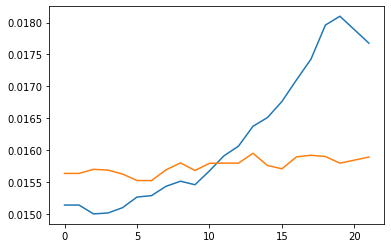

In [3]:

# Atmospheric neutrino flux (calculated in src/AtmNu_distribution.py)
recoildat_fname1 = recoil_dir+'AtmNu_Ecosth_'+Nuc.Name+'_Stationary.txt'
recoildat_fname2 = recoil_dir+'AtmNu_Ecosth_'+Nuc.Name+'_CygnusTracking.txt'
R1 = loadtxt(recoildat_fname1)
R2 = loadtxt(recoildat_fname2)

R1 = sum(R1[2:,:],1)
R2 = sum(R2[2:,:],1)
ce = sqrt(linspace(0.0,1.0,20+1))
cc = (ce[1:]+ce[0:-1])/2.0
ce = append(0.0,cc)
ce = append(ce,1.0)

dR_Atm1 = append(R1[0],R1)
dR_Atm1 = append(dR_Atm1,dR_Atm1[-1]+(dR_Atm1[-1]-dR_Atm1[-2]))
dR_Atm1 = sum(R1)*dR_Atm1/trapz(dR_Atm1,ce)
plt.plot(dR_Atm1,'-')

dR_Atm2 = append(R2[0],R2)
dR_Atm2 = append(dR_Atm2,dR_Atm2[-1]+(dR_Atm2[-1]-dR_Atm2[-2]))
dR_Atm2 = sum(R2)*dR_Atm2/trapz(dR_Atm2,ce)
plt.plot(dR_Atm2)

print(trapz(dR_Atm1,ce))
print(trapz(dR_Atm2,ce))

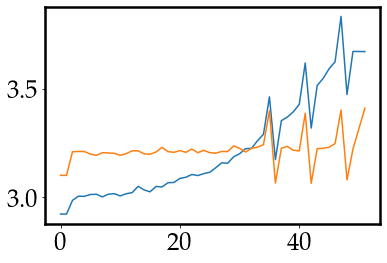

In [154]:
# #recoils = LoadAtmRecoils(Nuc)
# import NeutrinoFuncs
# R1,ce,ee = histogram2d(abs(recoils[:,2]),log10(recoils[:,0]),bins=(50,50),\
#                         range=[[0.0,1.0],[log10(E_min),log10(E_max)]])

# R2,ce,ee = histogram2d(abs(recoils[:,4]),log10(recoils[:,0]),bins=(50,50),\
#                         range=[[0.0,1.0],[log10(E_min),log10(E_max)]])
# R2 = R2/sum(R2)
# R1 = R1/sum(R1)
# R1 = sum(R1,1)
# R2 = sum(R2,1)
# R_Atm = R_AtmNu(30.0,E_max,Nuc=Nuc,eff_on=False)

# ce = sqrt(linspace(0.0,1.0,50+1))
# cc = (costh_edges[1:]+costh_edges[0:-1])/2.0
# ce = append(0.0,cc)
# ce = append(ce,1.0)

# dR_Atm1 = append(R1[0],R1)
# dR_Atm1 = append(dR_Atm1,dR_Atm1[-1]+(dR_Atm1[-1]-dR_Atm1[-2]))
# dR_Atm1 = R_Atm*dR_Atm1/trapz(dR_Atm1,ce)
# plt.plot(dR_Atm1*Exposure,'-')

# dR_Atm2 = append(R2[0],R2)
# dR_Atm2 = append(dR_Atm2,dR_Atm2[-1]+(dR_Atm2[-1]-dR_Atm2[-2]))
# dR_Atm2 = R_Atm*dR_Atm2/trapz(dR_Atm2,ce)
# plt.plot(dR_Atm2*Exposure)

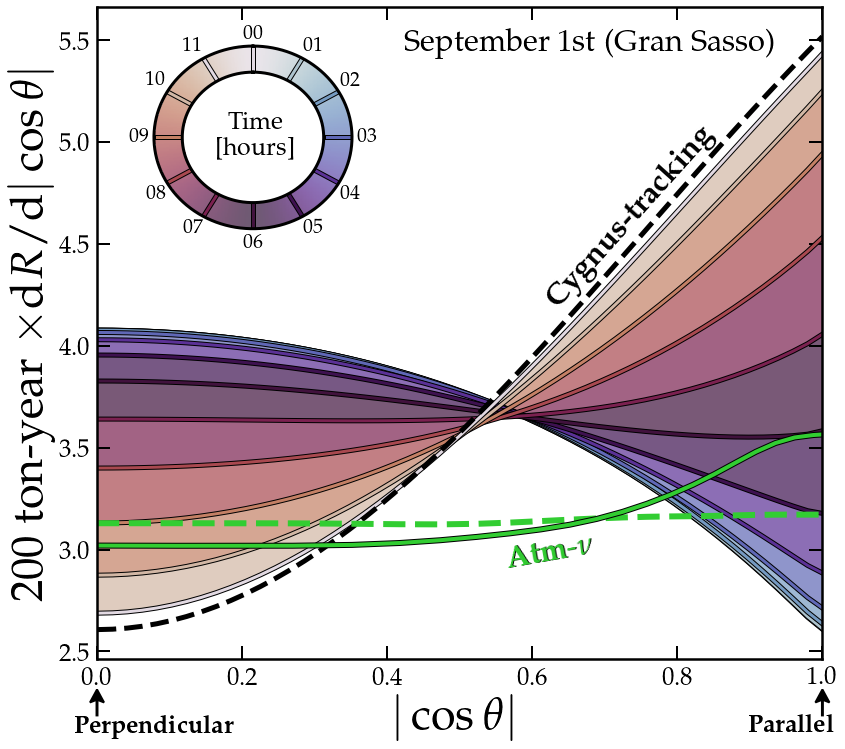

In [23]:
from scipy.ndimage.filters import gaussian_filter1d

fig,ax1 = MySquarePlot(r'$|\cos{\theta}|$',r'200 ton-year $\times \textrm{d}R/\textrm{d}|\cos{\theta}|$')
cols = cm.twilight(linspace(0,1,nt))
Exposure = 200.0
sigma_p = 2.5e-48
alph = 0.7

for i in range(0,nt-1):
    plt.fill_between(costh_vals,dR_costh[i,:]*Exposure*(sigma_p/1.0e-45),\
                     y2=dR_costh[i+1,:]*Exposure*(sigma_p/1.0e-45),\
                     lw=0,facecolor=cols[i,:],alpha=alph)
for i in range(0,nt):
    plt.plot(costh_vals,dR_costh[i,:]*Exposure*(sigma_p/1.0e-45),'k-',lw=5)
    plt.plot(costh_vals,dR_costh[i,:]*Exposure*(sigma_p/1.0e-45),'-',lw=3,color=cols[i,:])
plt.plot(costh_vals,dR_costh_CT*Exposure*(sigma_p/1.0e-45),'--',lw=5,color='k')

y1 = gaussian_filter1d(dR_Atm1*Exposure,sigma=2)
y2 = gaussian_filter1d(dR_Atm2*Exposure,sigma=2)

plt.plot(ce,y2,'--',lw=6,color='limegreen')
plt.plot(ce,y1,'-',lw=6,color='k')
plt.plot(ce,y1,'-',lw=4,color='limegreen')
#plt.plot(x,NAtm*y/y,'.',lw=6,color='k')
#plt.plot(x,NAtm*y/y,'.',lw=4,color='limegreen')
plt.gcf().text(0.561,0.23051,r'{\bf Atm}-$\nu$ ',color='k',fontsize=31,rotation=10)
plt.gcf().text(0.56,0.2305,r'{\bf Atm}-$\nu$ ',color='limegreen',fontsize=31,rotation=10)

plt.xlim([0,1])

plt.arrow(0.125, 0.06, 0.00, 0.03, transform=fig.transFigure,figure=fig,
      length_includes_head=True,lw=2,
      head_width=0.015, head_length=0.015, overhang=0.2,
      edgecolor='k',facecolor='k',zorder=10,clip_on=False)
plt.arrow(0.9, 0.06, 0.00, 0.03, transform=fig.transFigure,figure=fig,
      length_includes_head=True,lw=2,
      head_width=0.015, head_length=0.015, overhang=0.2,
      edgecolor='k',facecolor='k',zorder=10,clip_on=False)
plt.gcf().text(0.1,0.04,r'{\bf Perpendicular}')
plt.gcf().text(0.82,0.04,r'{\bf Parallel}')




plt.gcf().text(0.6,0.535,r'{\bf Cygnus-tracking}',rotation=48,fontsize=31)

plt.gcf().text(0.85,0.83,r'September 1st (Gran Sasso)',fontsize=31,horizontalalignment='right')



######



# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.02,0.6,0.39,0.4])
ax2.set_axes_locator(ip)

# Inset
rin = 0.5
rout = 0.7
x1 = -1.0
x2 = 1.0
y1 = -1.0
y2 = 1.0
x = linspace(x1,x2,200)
y = linspace(y1,y2,200)
[X,Y] = meshgrid(x,y)
C = arctan2(X,Y)
R = sqrt(X**2.0+Y**2.0)
C[R>rout] = nan
C[R<rin] = nan
#cnt1 = ax2.contourf(x,y,flipud(C),levels=linspace(-pi,pi,300),cmap=cm.twilight_r,alpha=alph,antialiased=True,linestyles=None,linewidths=0)
#for c in cnt1.collections:
#    c.set_edgecolor("face")
#    c.set_linewidth(0.000000000001)

#pcol = ax2.pcolormesh(x,y,flipud(C),cmap=cm.twilight_r,alpha=1,linewidth=0,rasterized=True,antialiased=True)
#pcol.set_edgecolor('face')
ax2.imshow(C,extent=(-1,1,-1,1),cmap=cm.twilight_r,alpha=alph,aspect='auto')


txt = ['00','01','02','03','04','05','06','07','08','09','10','11']
#txt = ['00','03','06','09','12','15','18','21']

off = 0.013
rsm = 0.02
th = linspace(0,2*pi-(2*pi)/(1.0*nt),nt)
for i in range(0,nt):
    ax2.plot(array([rin+rsm,rout-rsm])*sin(th[i]),array([rin+rsm,rout-rsm])*cos(th[i]),lw=5,color='k')
    ax2.plot(array([rin+rsm,rout-rsm])*sin(th[i]),array([rin+rsm,rout-rsm])*cos(th[i]),lw=3,color=cols[i,:])
    
    xt = (rout+off)*sin(th[i])
    yt = (rout+off)*cos(th[i])
    if yt<0.0:
        va = 'top'
    else:
        va = 'bottom'
        
        
    if xt<0.0:
        ha = 'right'
    else:
        ha = 'left'
        
    if abs(sin(th[i]))==1.0:
        va = 'center'
    
    if abs(cos(th[i]))==1.0:
        ha = 'center'
        
    if txt[i]=='03':
        xt = xt+0.025
    if txt[i]=='09':
        xt = xt-0.025
    if txt[i]=='06':
        yt = yt-0.025
    ax2.text(xt,yt,txt[i],color='k',fontsize=20,horizontalalignment=ha,verticalalignment=va)
    
    
thfine = linspace(0,2*pi,1000)
ax2.plot(rin*sin(thfine),rin*cos(thfine),lw=3,color='k')
ax2.plot(rout*sin(thfine),rout*cos(thfine),lw=3,color='k')

ax2.text(0.02,0+0.1,'Time',fontsize=25,horizontalalignment='center',verticalalignment='center')
ax2.text(0.02,-0.1,'[hours]',fontsize=25,horizontalalignment='center',verticalalignment='center')
ax2.axis('off')

plt.show()
MySaveFig(fig,"WIMPRecoils_costh")

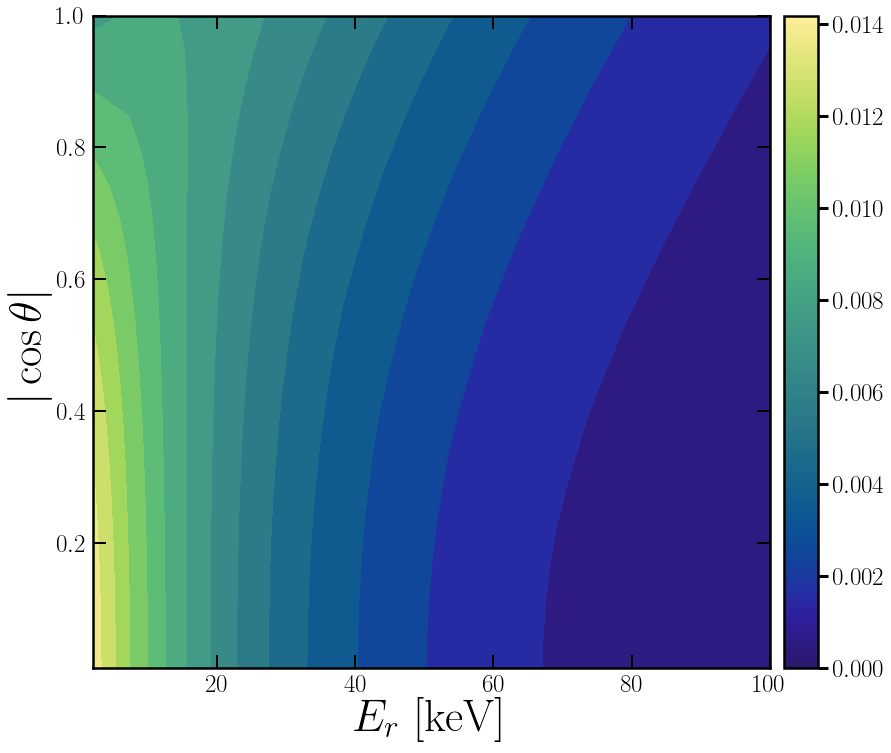

In [13]:
Ex = 3000.0

fig,ax1 = MySquarePlot(r'$E_r$ [keV]',r'$|\cos{\theta}|$')

cmap = cmocean.cm.haline
im = ax1.pcolormesh(E_r_vals,costh_vals,dR3,cmap=cmap,vmin=0)
ax1.contourf(E_r_vals,costh_vals,dR*3000,levels=15,cmap=cmap,vmin=0)

cbar(im)
#ax1.set_xscale('log')

In [23]:
NAtm = sum(RAtm_costh*Exposure)
y = RAtm_costh*NAtm
y = append(y[0],y)
y = append(y,y[-1]+(y[-1]-y[-2]))
x = append(0.0,cc)
x = append(x,1.0)
y = NAtm*y/trapz(y,x)

4.554940371012627

In [7]:
T = zeros(shape=nt)
for i in range(0,nt):
    T[i] = JulianDay(9,12,2018,tvals[i])

for i in range(0,nt):
    print(LabFuncs.LabVelocity(T[i], GranSasso, SHMpp))

for i in range(0,nt):
    v_lab = LabFuncs.LabVelocity(T[i], GranSasso, SHMpp) 
    print(array([0.0,0.0,sqrt(sum(v_lab**2.0))]))

[ 66.48221362 103.56991311 211.92781985]
[ 87.2810701  128.91889044 189.20775339]
[111.80679516 145.40150824 162.41610891]
[138.37746496 151.89010808 133.39037271]
[165.17139038 147.94234058 104.12072339]
[190.35201693 133.83132077  76.61357983]
[212.19381371 110.52673707  52.75406863]
[229.20052472  79.62821626  34.17683572]
[240.20767359  43.2555265   22.15406077]
[244.462303     3.90315489  17.50834276]
[241.67448827 -35.73076926  20.55642171]
[232.03709878 -72.92946541  31.08758959]
[ 216.2124628  -105.143727     48.37825887]
[ 195.28685512 -130.16661957   71.24168435]
[ 170.69593677 -146.28467213   98.10941956]
[ 144.12626476 -152.39520919  127.13891649]
[ 117.3996249  -148.08178903  156.33989092]
[  92.34812526 -133.64258377  183.71078165]
[  70.68861197 -110.06977116  207.37595007]
[ 53.90501307 -78.98135851 225.71421847]
[ 43.14667863 -42.51012614 237.46993248]
[ 39.14967791  -3.1573133  241.83894321]
[ 42.18644303  36.37892122 238.52362107]
[ 52.04720635  73.38849199 227.75313

(-1.0, 1.0, -1.0, 1.0)

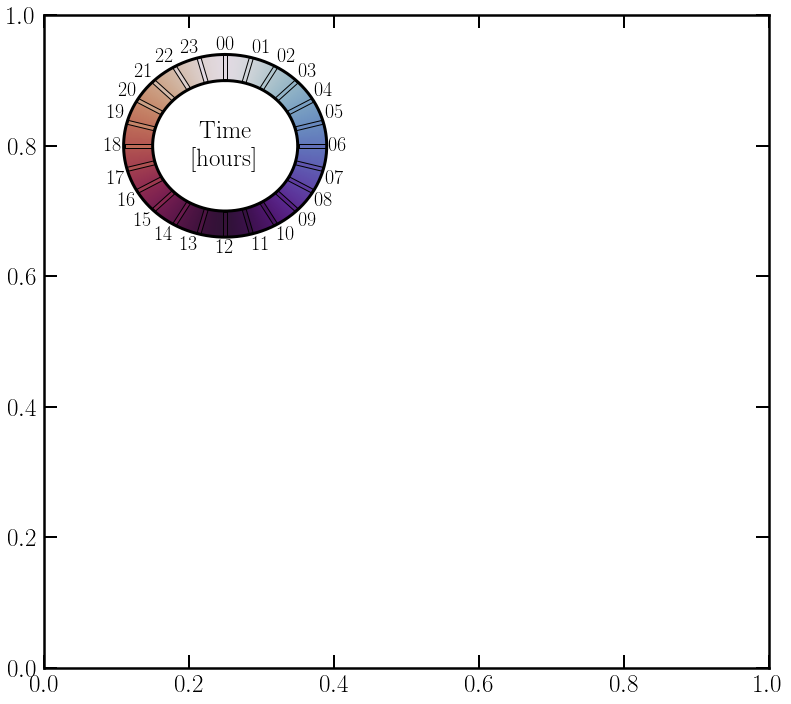

In [73]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

fig,ax1 = MySquarePlot()


# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.6,0.4,0.4])
ax2.set_axes_locator(ip)

# Inset
rin = 0.5
rout = 0.7
x1 = -1.0
x2 = 1.0
y1 = -1.0
y2 = 1.0
x = linspace(x1,x2,1000)
y = linspace(y1,y2,1000)
[X,Y] = meshgrid(x,y)
C = arctan2(X,Y)
R = sqrt(X**2.0+Y**2.0)
C[R>rout] = nan
C[R<rin] = nan
ax2.pcolormesh(x,y,flipud(fliplr(C)),cmap=cm.twilight,alpha=0.5)

txt = ['00','01','02','03','04','05','06','07','08','09','10','11',
      '12','13','14','15','16','17','18','19','20','21','22','23']

off = 0.01
rsm = 0.02
th = linspace(0,2*pi-(2*pi)/24,24)
for i in range(0,24):
    ax2.plot(array([rin+rsm,rout-rsm])*sin(th[i]),array([rin+rsm,rout-rsm])*cos(th[i]),lw=5,color='k')
    ax2.plot(array([rin+rsm,rout-rsm])*sin(th[i]),array([rin+rsm,rout-rsm])*cos(th[i]),lw=3,color=cols[i,:])
    
    xt = (rout+off)*sin(th[i])
    yt = (rout+off)*cos(th[i])
    if yt<0.0:
        va = 'top'
    else:
        va = 'bottom'
        
        
    if xt<0.0:
        ha = 'right'
    else:
        ha = 'left'
        
    if abs(sin(th[i]))==1.0:
        va = 'center'
    
    if abs(cos(th[i]))==1.0:
        ha = 'center'
    ax2.text(xt,yt,txt[i],color='k',fontsize=20,horizontalalignment=ha,verticalalignment=va)
    
    
thfine = linspace(0,2*pi,1000)
ax2.plot(rin*sin(thfine),rin*cos(thfine),lw=3,color='k')
ax2.plot(rout*sin(thfine),rout*cos(thfine),lw=3,color='k')

ax2.text(0,0+0.1,'Time',fontsize=25,horizontalalignment='center',verticalalignment='center')
ax2.text(0,-0.1,'[hours]',fontsize=25,horizontalalignment='center',verticalalignment='center')
ax2.axis('off')


In [15]:
Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(3.0,Nuc=Nuc)


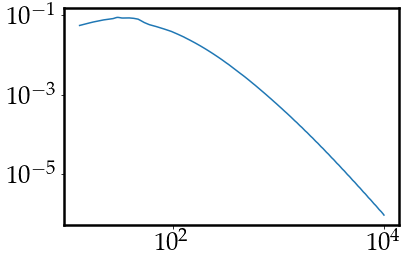

In [19]:
plt.loglog(E_nu_all[-2,:],Flux_all[-2,:])

In [22]:
E_nu_all[-2,:]

array([   13.183     ,    13.27080051,    13.35918578,    13.4481597 ,
          13.53772621,    13.62788924,    13.71865277,    13.81002079,
          13.90199734,    13.99458646,    14.08779224,    14.18161878,
          14.27607022,    14.37115072,    14.46686446,    14.56321568,
          14.6602086 ,    14.75784751,    14.85613671,    14.95508052,
          15.05468332,    15.15494948,    15.25588343,    15.35748961,
          15.45977251,    15.56273662,    15.66638648,    15.77072667,
          15.87576177,    15.98149642,    16.08793528,    16.19508304,
          16.30294441,    16.41152416,    16.52082706,    16.63085793,
          16.74162162,    16.85312302,    16.96536702,    17.07835859,
          17.1921027 ,    17.30660435,    17.4218686 ,    17.53790053,
          17.65470525,    17.7722879 ,    17.89065366,    18.00980776,
          18.12975544,    18.25050198,    18.37205272,    18.49441299,
          18.61758821,    18.74158378,    18.86640519,    18.99205792,
      